# Power, Corruption, & Lies by New Order - Album Sentiment Analysis

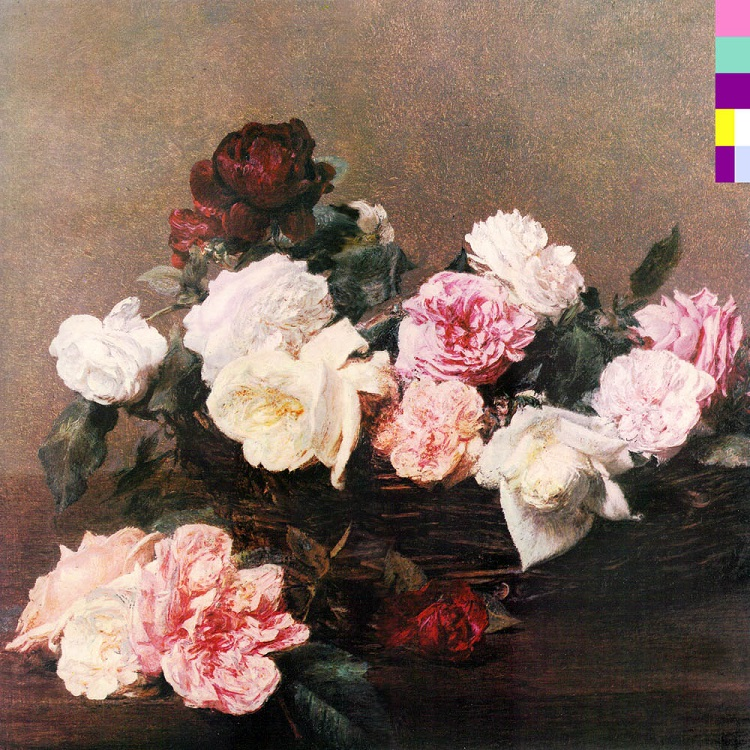

This Jupyter Notebook contains summary level data visualizations of the *Power, Corruption, and Lies* album by the band New Order. The DataFrame used for these visualizations uses Spotify Track Audio Features as well as lyrical sentiment analysis via RoBERTa. The script to gather, process, and merge the data used here is available as a seperate .py file.

## Import Libraries and DataFrame

In [60]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio

import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pio.templates.default = 'seaborn'

In [61]:
album = pd.read_csv('NewOrder_PCL_Sentiment.csv')

display(album)

,Title,Sentiment,Danceability,Energy,Speechiness,Anger,Disgust,Fear,Joy,Neutral,Sadness,Surprise,Lyrics
0,Age of Consent,Sadness,0.372,0.910,0.0392,0.041353,0.014629,0.131845,0.004598,0.049773,0.724334,0.033469,Won't you please let me go? These words lie in...
1,We All Stand,Neutral,0.659,0.687,0.0325,0.078288,0.034045,0.249642,0.007126,0.517115,0.074783,0.039002,Three miles to go Three miles to go At the end...
2,The Village,Sadness,0.608,0.957,0.0302,0.014388,0.004271,0.054425,0.152831,0.122454,0.417836,0.233794,When a new life turns towards you And the nigh...
3,5 8 6,Fear,0.543,0.730,0.0651,0.004929,0.000535,0.975216,0.001980,0.004762,0.007254,0.005325,"I see danger, danger, danger All on the corner..."
4,Your Silent Face,Fear,0.642,0.778,0.0313,0.229637,0.057814,0.279566,0.018343,0.119021,0.218236,0.077383,A thought that never changes remains a stupid ...
5,Ultraviolence,Anger,0.848,0.923,0.0388,0.743796,0.037815,0.086395,0.001325,0.030242,0.058686,0.041740,Who saw those dark eyes? Who saw those dark ey...
6,Ecstacy,Neutral,0.717,0.715,0.0318,0.014660,0.077197,0.032861,0.008672,0.415686,0.288659,0.162265,You... Were... So... Blind...
7,Leave Me Alone,Fear,0.537,0.862,0.0280,0.014759,0.015668,0.564942,0.015587,0.147302,0.196495,0.045248,On a thousand islands in the sea I see a thous...


## Spotify Audio Features & RoBERTa Sentiment Model

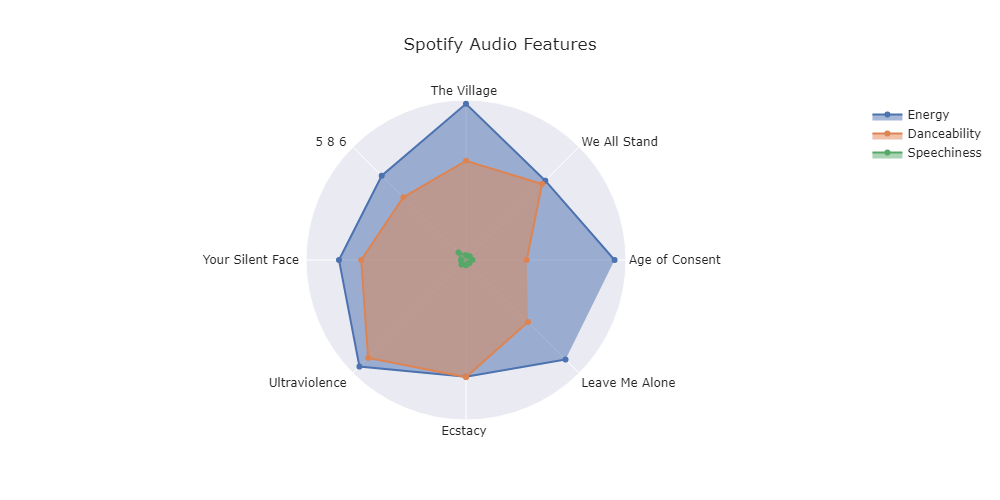

In [62]:
fig1 = go.Figure()

fig1.add_trace(go.Scatterpolar(r=album['Energy'],
                               theta=album['Title'],
                               fill='toself',
                               name='Energy'))

fig1.add_trace(go.Scatterpolar(r=album['Danceability'],
                               theta=album['Title'],
                               fill='toself',
                               name='Danceability'))

fig1.add_trace(go.Scatterpolar(r=album['Speechiness'],
                               theta=album['Title'],
                               fill='toself',
                               name='Speechiness'))

fig1.update_layout(polar_radialaxis_visible=False,
                   title='Spotify Audio Features')
                             
fig1.show(renderer='png', height=500, width=1000)

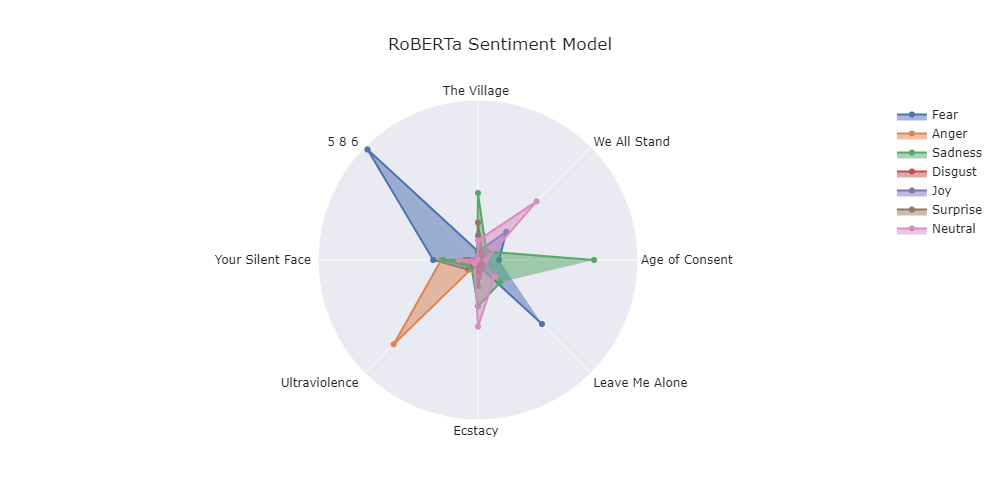

In [63]:
fig2 = go.Figure()

fig2.add_trace(go.Scatterpolar(r=album['Fear'],
                               theta=album['Title'],
                               fill='toself',
                               name='Fear'))

fig2.add_trace(go.Scatterpolar(r=album['Anger'],
                               theta=album['Title'],
                               fill='toself',
                               name='Anger'))

fig2.add_trace(go.Scatterpolar(r=album['Sadness'],
                               theta=album['Title'],
                               fill='toself',
                               name='Sadness'))

fig2.add_trace(go.Scatterpolar(r=album['Disgust'],
                               theta=album['Title'],
                               fill='toself',
                               name='Disgust'))

fig2.add_trace(go.Scatterpolar(r=album['Joy'],
                               theta=album['Title'],
                               fill='toself',
                               name='Joy'))

fig2.add_trace(go.Scatterpolar(r=album['Surprise'],
                               theta=album['Title'],
                               fill='toself',
                               name='Surprise'))

fig2.add_trace(go.Scatterpolar(r=album['Neutral'],
                               theta=album['Title'],
                               fill='toself',
                               name='Neutral'))

fig2.update_layout(polar_radialaxis_visible=False,
                   title='RoBERTa Sentiment Model')
                             
fig2.show(renderer='png', height=500, width=1000)

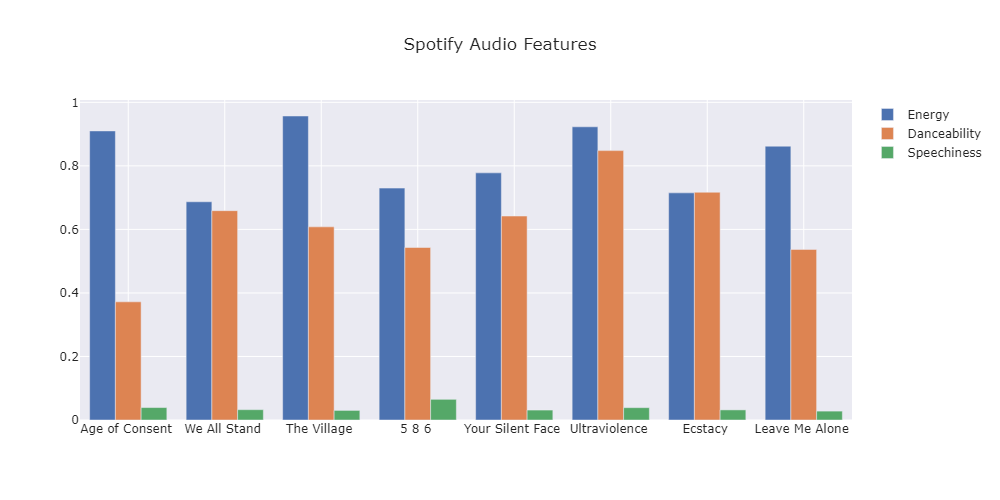

In [64]:
fig3 = go.Figure()

fig3.add_trace(go.Bar(x=album['Title'],
                      y=album['Energy'],
                      name='Energy'))

fig3.add_trace(go.Bar(x=album['Title'],
                      y=album['Danceability'],
                      name='Danceability'))

fig3.add_trace(go.Bar(x=album['Title'],
                      y=album['Speechiness'],
                      name='Speechiness'))

fig3.update_layout(title='Spotify Audio Features')

fig3.show(renderer='png', height=500, width=1000)

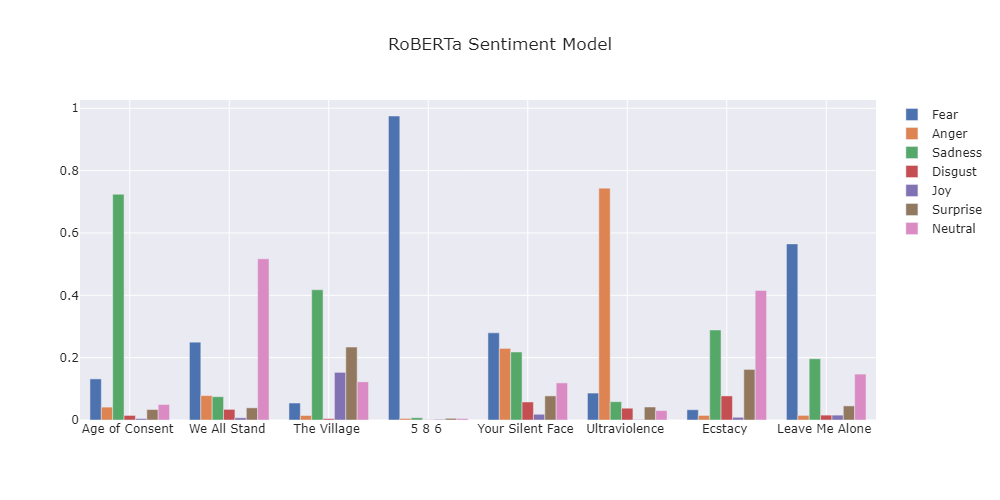

In [65]:
fig4 = go.Figure()

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Fear'],
                      name='Fear'))

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Anger'],
                      name='Anger'))

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Sadness'],
                      name='Sadness'))

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Disgust'],
                      name='Disgust'))

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Joy'],
                      name='Joy'))

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Surprise'],
                      name='Surprise'))

fig4.add_trace(go.Bar(x=album['Title'],
                      y=album['Neutral'],
                      name='Neutral'))

fig4.update_layout(title='RoBERTa Sentiment Model')

fig4.show(renderer='png', height=500, width=1000)

## Album Lyrics Word Cloud with Image Mask

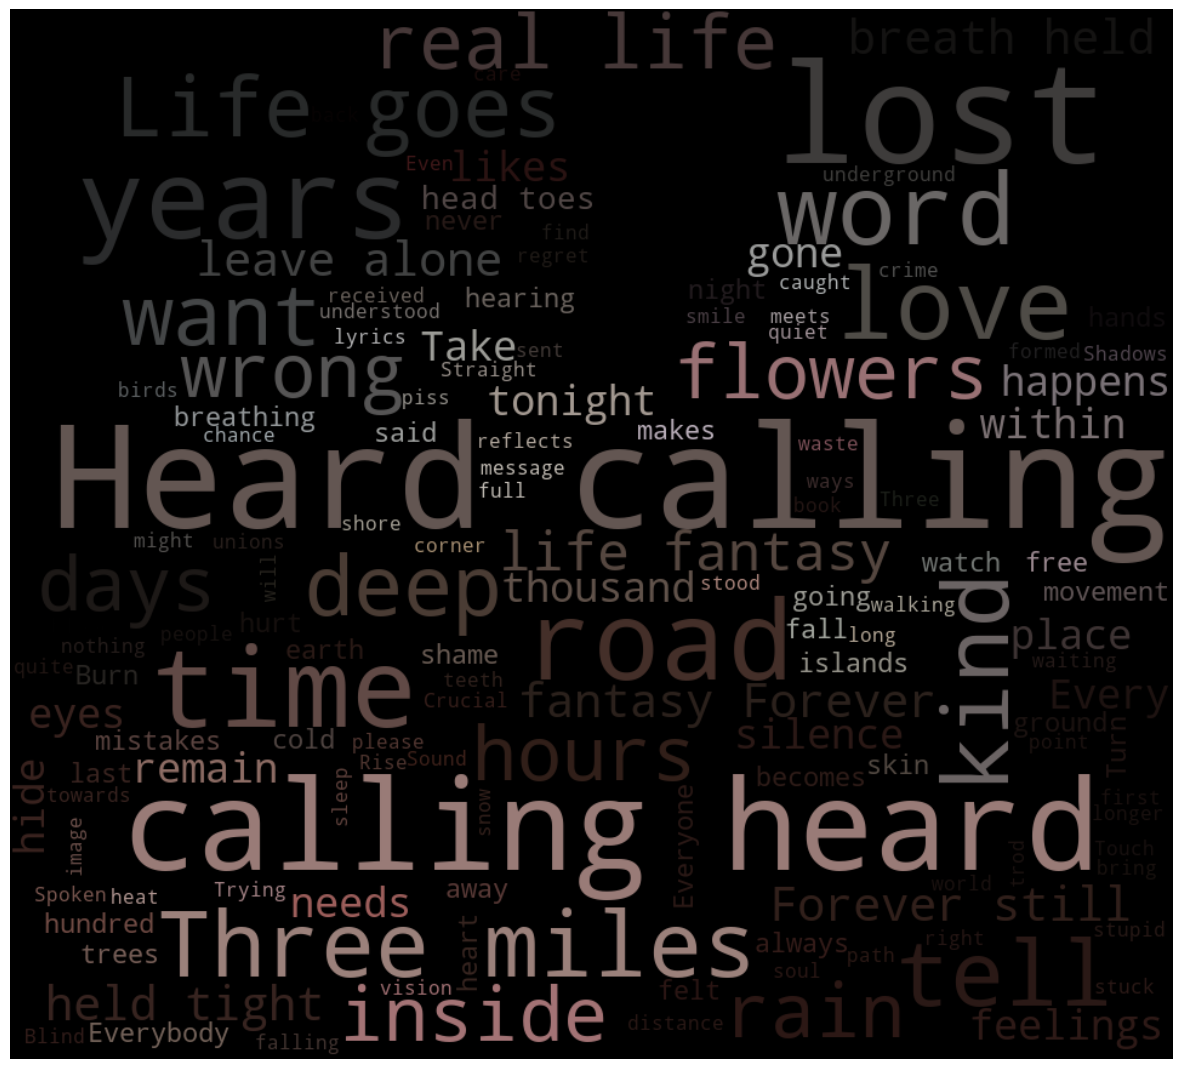

In [66]:
# Combine lyrics from each row of the 'Lyrics' column into a single variable
combined_lyrics = ' '.join(album.Lyrics)

# Generate an image mask from a version of the album cover with a black background
pcl_mask = np.array(Image.open('pcl_album_cover.png'))
pcl_colors = ImageColorGenerator(pcl_mask)

# Generate wordcloud with black background
wc = WordCloud(mask=pcl_mask, background_color='black', 
               min_word_length=4, max_words=1000, 
               max_font_size=None).generate(combined_lyrics)

# Display final output
plt.figure(figsize=[15,15])
plt.imshow(wc.recolor(color_func=pcl_colors), interpolation='bilinear')
plt.axis('off')
plt.show()